<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:

#Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Cargamos los archivos que tenemos a analizar
company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_end = pd.read_csv('/datasets/project_sql_result_04.csv')

#Cargamos los datos en los que realizaremos nuestras hipótesis.
hypothesis_df = pd.read_csv('/datasets/project_sql_result_07.csv')

#Imprimimos para revisar el estado de los datos
print(company_data.info())
print(company_data.sample(10))

print(trips_end.info())
print(trips_end.sample(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                        company_name  trips_amount
23             KOAM Taxi Association          1259
30                        Setare Inc           230
35       6742 - 83735 Tasha Ride Inc            39
25               Top Cab Affiliation           978
31  American United Taxi Affiliation           210
49            5074 - 54002 Ahzmi Inc            16
7                           Sun Taxi          7701
44        2092 - 61288 Sbeih Company            27
11                        Globe Taxi          4383
62        2241 - 44667 - Felman Corp             3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column 

In [2]:
#Los datos parecen estar en orden. No tenemos valores nulos y el tipo de datos están en valores correctos. 
#Buscamos los 10 principales barrios
top_dropoff_locations = trips_end.sort_values(by='average_trips', ascending=False)[['dropoff_location_name', 'average_trips']].head(10)
print(f'Top 10 dropoff location on November 2017', '\n', top_dropoff_locations)

Top 10 dropoff location on November 2017 
   dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


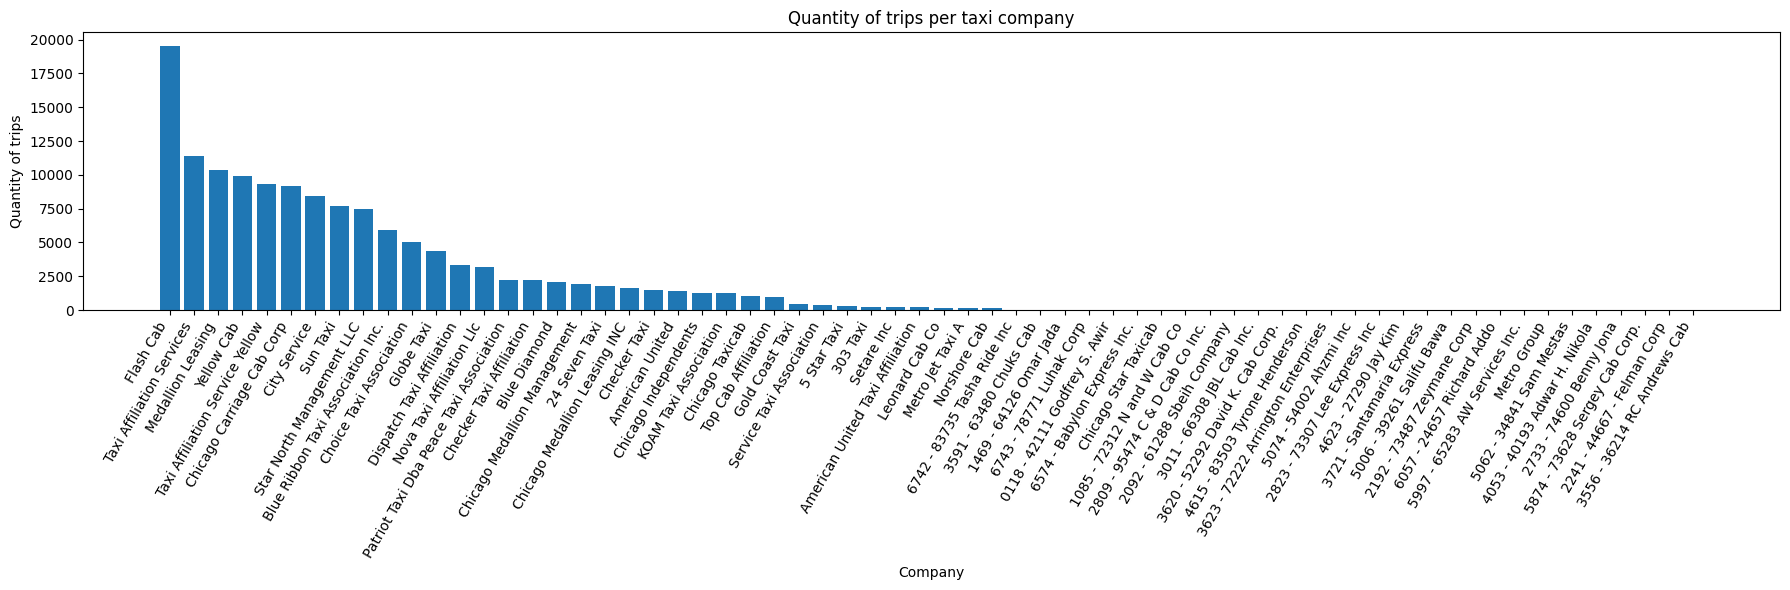

In [3]:
#Ahora graficamos las cantidades de viajes por compañía de taxi
plt.figure(figsize=(18,6)) 
plt.bar(company_data['company_name'], company_data['trips_amount'])
plt.title('Quantity of trips per taxi company')
plt.xlabel('Company')
plt.ylabel('Quantity of trips')

plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados.

Una manera alternativa de mostrar este gráfico es limitando el número de elementos que se muestran, por ejemplo, mostrar solo el top 15 de empresas    
</div>

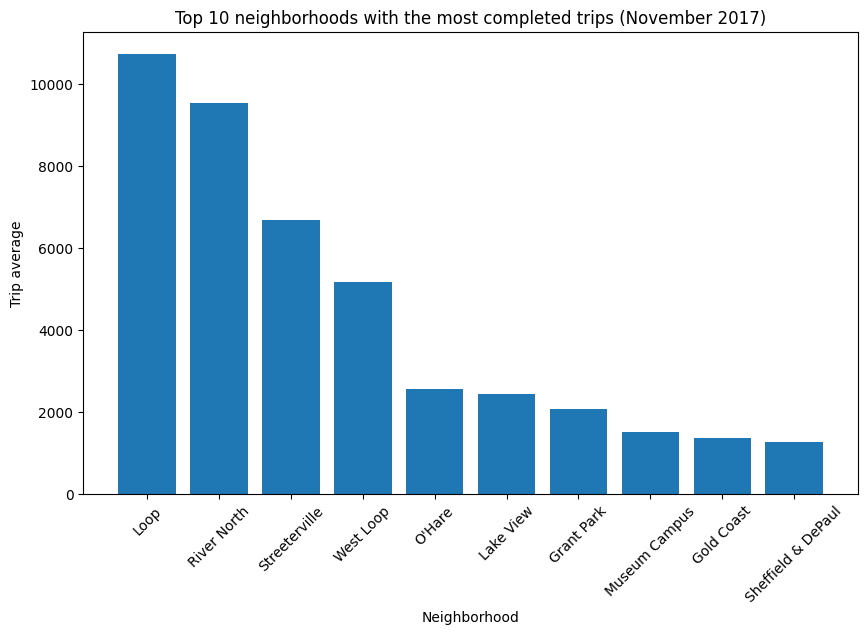

In [4]:
#Graficamos el resultado con los 10 barrios con más viajes finalizados
plt.figure(figsize=(10,6))
top_data = trips_end.sort_values(by='average_trips', ascending=False).head(10)
plt.bar(top_data['dropoff_location_name'], top_data['average_trips'])
plt.title('Top 10 neighborhoods with the most completed trips (November 2017)')
plt.xlabel('Neighborhood')
plt.ylabel('Trip average')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

In [5]:
print(hypothesis_df.info)
print(hypothesis_df.head(10))

<bound method DataFrame.info of                  start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]>
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  201

In [6]:
#Convertimos la columna del tipo de tiempo a formato de hora y fecha
hypothesis_df['start_ts'] = pd.to_datetime(hypothesis_df['start_ts'])

#Filtramos los viajes del día Sábado
hypothesis_df['day_of_week'] = hypothesis_df['start_ts'].dt.dayofweek
saturdays = hypothesis_df[hypothesis_df['day_of_week'] == 5]

print(f'Total quantity of trips on Sundays: {len(saturdays)}')

Total quantity of trips on Sundays: 1068


In [7]:
#Separamos los días Sábados sin lluvia y con lluvia
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Good']

print(f'Trips on rainy Saturdays: {len(rainy_saturdays)}')
print(f'Trips on non rainy Saturdays: {len(non_rainy_saturdays)}')

print("\nAverage duration:")
print(f"Rainy Saturdays: {rainy_saturdays['duration_seconds'].mean():.2f} seconds")
print(f"Non rainy Saturdays: {non_rainy_saturdays['duration_seconds'].mean():.2f} seconds")

Trips on rainy Saturdays: 180
Trips on non rainy Saturdays: 888

Average duration:
Rainy Saturdays: 2427.21 seconds
Non rainy Saturdays: 1999.68 seconds


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<b/>

La manera de separar la información de ambos días es correcta
</div>

In [8]:
# Definimos las hipótesis
# H₀ (hipótesis nula): no hay diferencia en la duración promedio de los viajes
# H₁ (hipótesis alternativa): sí hay una diferencia en la duración promedio de los viajes

#Nivel de significación
alpha = 0.05  

# Usaremos Mann–Whitney U Test porque:
# Compara dos muestras independientes
# No requiere suponer normalidad en los datos
stat, p_value = stats.mannwhitneyu(
    rainy_saturdays['duration_seconds'],
    non_rainy_saturdays['duration_seconds'],
    alternative='two-sided'
)

print(f"\nEstadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")


Estadístico U: 108193.50
Valor p: 0.0000


In [9]:
#Interpretamos el resultado
if p_value < alpha:
    print("H₀ rejected: Average trip duration DOES change on rainy Saturdays.")
else:
    print("H₀ is not rejected: There is not enough evidence to claim that the duration changes.")

H₀ rejected: Average trip duration DOES change on rainy Saturdays.


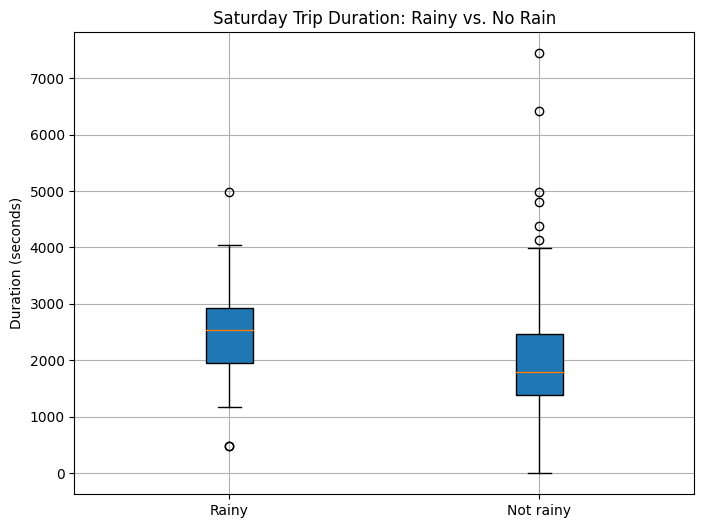

In [10]:
# Graficamos la comparación

plt.figure(figsize=(8,6))
plt.boxplot(
    [rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds']],
    labels=['Rainy', 'Not rainy'],
    patch_artist=True
)
plt.title('Saturday Trip Duration: Rainy vs. No Rain')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones, lo cual es bastante obvio cuando se miran los diagramas de caja y vemos las distribuciones que son muy diferentes
</div>

## Conclusión de la prueba de hipótesis

##### Se evaluó la hipótesis: 
##### "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
##### Esto me llevó a seleccionar solamente los viajes del día sábado y dividirlos en dos grupos: 
##### -Sábados con lluvia, identificado con la variable 'rain' en el código.
##### -Sábados sin lluvia, los que no contenían ese término.

##### Dado que las distribuciones de duración (duration_seconds) no pueden asumirse normales y los tamaños de muestra podrían ser distintos, se aplicó la prueba no paramétrica de Mann–Whitney U, que compara medianas entre dos grupos independientes sin requerir normalidad.

##### Se estableció el nivel de significación alpha = 0.05.
##### Hipótesis:

##### H₀ (nula): la duración promedio de los viajes es igual los sábados lluviosos y los sábados sin lluvia.

##### H₁ (alternativa): la duración promedio de los viajes es diferente entre sábados lluviosos y sin lluvia.

## Resultados

##### Dado que p < 0.05, rechazamos la hipótesis nula.
##### Esto indica que existen diferencias estadísticamente significativas en la duración promedio de los viajes entre sábados lluviosos y sábados sin lluvia.
##### En otras palabras, la lluvia afecta de forma significativa la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
##### Es probable que las condiciones climáticas afecten los tiempos de viaje, incrementando su duración promedio debido a tráfico más lento o congestión vial.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- Se revisaron detalles muy minuciosamente con bastante cuidado    
    
</div>
